# Load European Art Dataset from HuggingFace

Import the DEArt (Dataset of European Art) from HuggingFace into Pixeltable tables.

**What's in this recipe:**
- Import European Art dataset with images and object detection annotations
- Sample 1% of the training split (~152 images from 15,154 total)
- Dataset contains paintings from XIIth-XVIIIth centuries
- 69 object classes including cultural heritage-specific categories
- Work with historical artwork images in Pixeltable

## Problem

The DEArt dataset contains over 15,000 images of European paintings from the 12th-18th centuries with object detection annotations. You need a representative sample of this cultural heritage dataset in Pixeltable to apply AI models for art analysis without downloading the entire dataset.

## Solution

**What's in this recipe:**
- Import 1% sample (~152 images) from the European Art dataset using HuggingFace
- Automatic schema handling for images and object detection labels
- Work with historical artwork images and cultural heritage annotations

The dataset includes 69 object classes, with over 50 classes specific to cultural heritage (angels, halos, crowns, religious symbols, mythical creatures, etc.) that don't appear in standard computer vision datasets.

### Setup

In [1]:
!uv add pixeltable datasets transformers torch accelerate pillow

Resolved 275 packages in 3ms
Audited 178 packages in 35ms


In [2]:
import pixeltable as pxt
from datasets import load_dataset

In [3]:
pxt.list_tables()

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/alison-pxt/.pixeltable/pgdata


['coco_images.samples']

### Load European Art Dataset from HuggingFace

Load 1% of the [DEArt dataset](https://huggingface.co/datasets/biglam/european_art) from HuggingFace. The dataset contains 15,154 images in the train split, so we'll sample ~152 images.

In [4]:
# Load the full dataset
dataset = load_dataset('biglam/european_art', split='train')

# Calculate 1% of the dataset
total_size = len(dataset)
sample_size = int(total_size * 0.01)

print(f"Total images: {total_size}")
print(f"Sampling {sample_size} images (1%)")

# Take 1% sample
dataset_sample = dataset.shuffle(seed=42).select(range(sample_size))

README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/37 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/37 [00:00<?, ?it/s]

data/train-00000-of-00037.parquet:   0%|          | 0.00/437M [00:00<?, ?B/s]

data/train-00001-of-00037.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

data/train-00002-of-00037.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

data/train-00003-of-00037.parquet:   0%|          | 0.00/508M [00:00<?, ?B/s]

data/train-00004-of-00037.parquet:   0%|          | 0.00/480M [00:00<?, ?B/s]

data/train-00005-of-00037.parquet:   0%|          | 0.00/541M [00:00<?, ?B/s]

data/train-00006-of-00037.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

data/train-00007-of-00037.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

data/train-00008-of-00037.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

data/train-00009-of-00037.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

data/train-00010-of-00037.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00011-of-00037.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

data/train-00012-of-00037.parquet:   0%|          | 0.00/471M [00:00<?, ?B/s]

data/train-00013-of-00037.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

data/train-00014-of-00037.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

data/train-00015-of-00037.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

data/train-00016-of-00037.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

data/train-00017-of-00037.parquet:   0%|          | 0.00/539M [00:00<?, ?B/s]

data/train-00018-of-00037.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

data/train-00019-of-00037.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

data/train-00020-of-00037.parquet:   0%|          | 0.00/524M [00:00<?, ?B/s]

data/train-00021-of-00037.parquet:   0%|          | 0.00/471M [00:00<?, ?B/s]

data/train-00022-of-00037.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

data/train-00023-of-00037.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

data/train-00024-of-00037.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

data/train-00025-of-00037.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

data/train-00026-of-00037.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

data/train-00027-of-00037.parquet:   0%|          | 0.00/514M [00:00<?, ?B/s]

data/train-00028-of-00037.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

data/train-00029-of-00037.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

data/train-00030-of-00037.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

data/train-00031-of-00037.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

data/train-00032-of-00037.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

data/train-00033-of-00037.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

data/train-00034-of-00037.parquet:   0%|          | 0.00/457M [00:00<?, ?B/s]

data/train-00035-of-00037.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

data/train-00036-of-00037.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15154 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

Total images: 15154
Sampling 151 images (1%)


In [5]:
# Inspect a sample record
print(dataset_sample[0].keys())

dict_keys(['image', 'file_id', 'annotations'])


### Create Pixeltable Table

Create a table and insert the sampled artwork images with their metadata.

In [6]:
# Create directory for European Art data
pxt.drop_dir('european_art', force=True)
pxt.create_dir('european_art')

Created directory 'european_art'.


In [7]:
# Create table with schema for artwork images
t = pxt.create_table(
    'european_art.paintings',
    schema={
        'image': pxt.Image,
        'file_id': pxt.String,
        'source': pxt.String,
        'width': pxt.Int,
        'height': pxt.Int,
        'annotations': pxt.Json
    }
)

Created table 'paintings'.


In [8]:
# Prepare rows for insertion from HuggingFace dataset
rows = []
for sample in dataset_sample:
    rows.append({
        'image': sample['image'],
        'file_id': sample['file_id'],
        'source': 'European Art Dataset',
        'width': sample['image'].width,
        'height': sample['image'].height,
        'annotations': sample['annotations']
    })

t.insert(rows)
print(f"Inserted {len(rows)} images")

Inserting rows into `paintings`: 151 rows [00:00, 155.27 rows/s]
Inserted 151 rows with 0 errors.
Inserted 151 images


image   file_id  width  height
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  00022412    560     771
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  00013851   1180    1600
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  00022002   4000    3147
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  00017663    600     586
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  00025763    645    1024
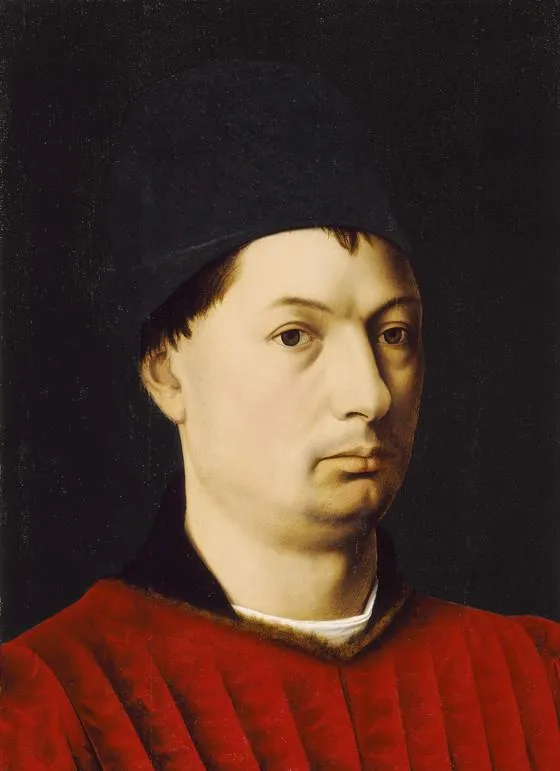
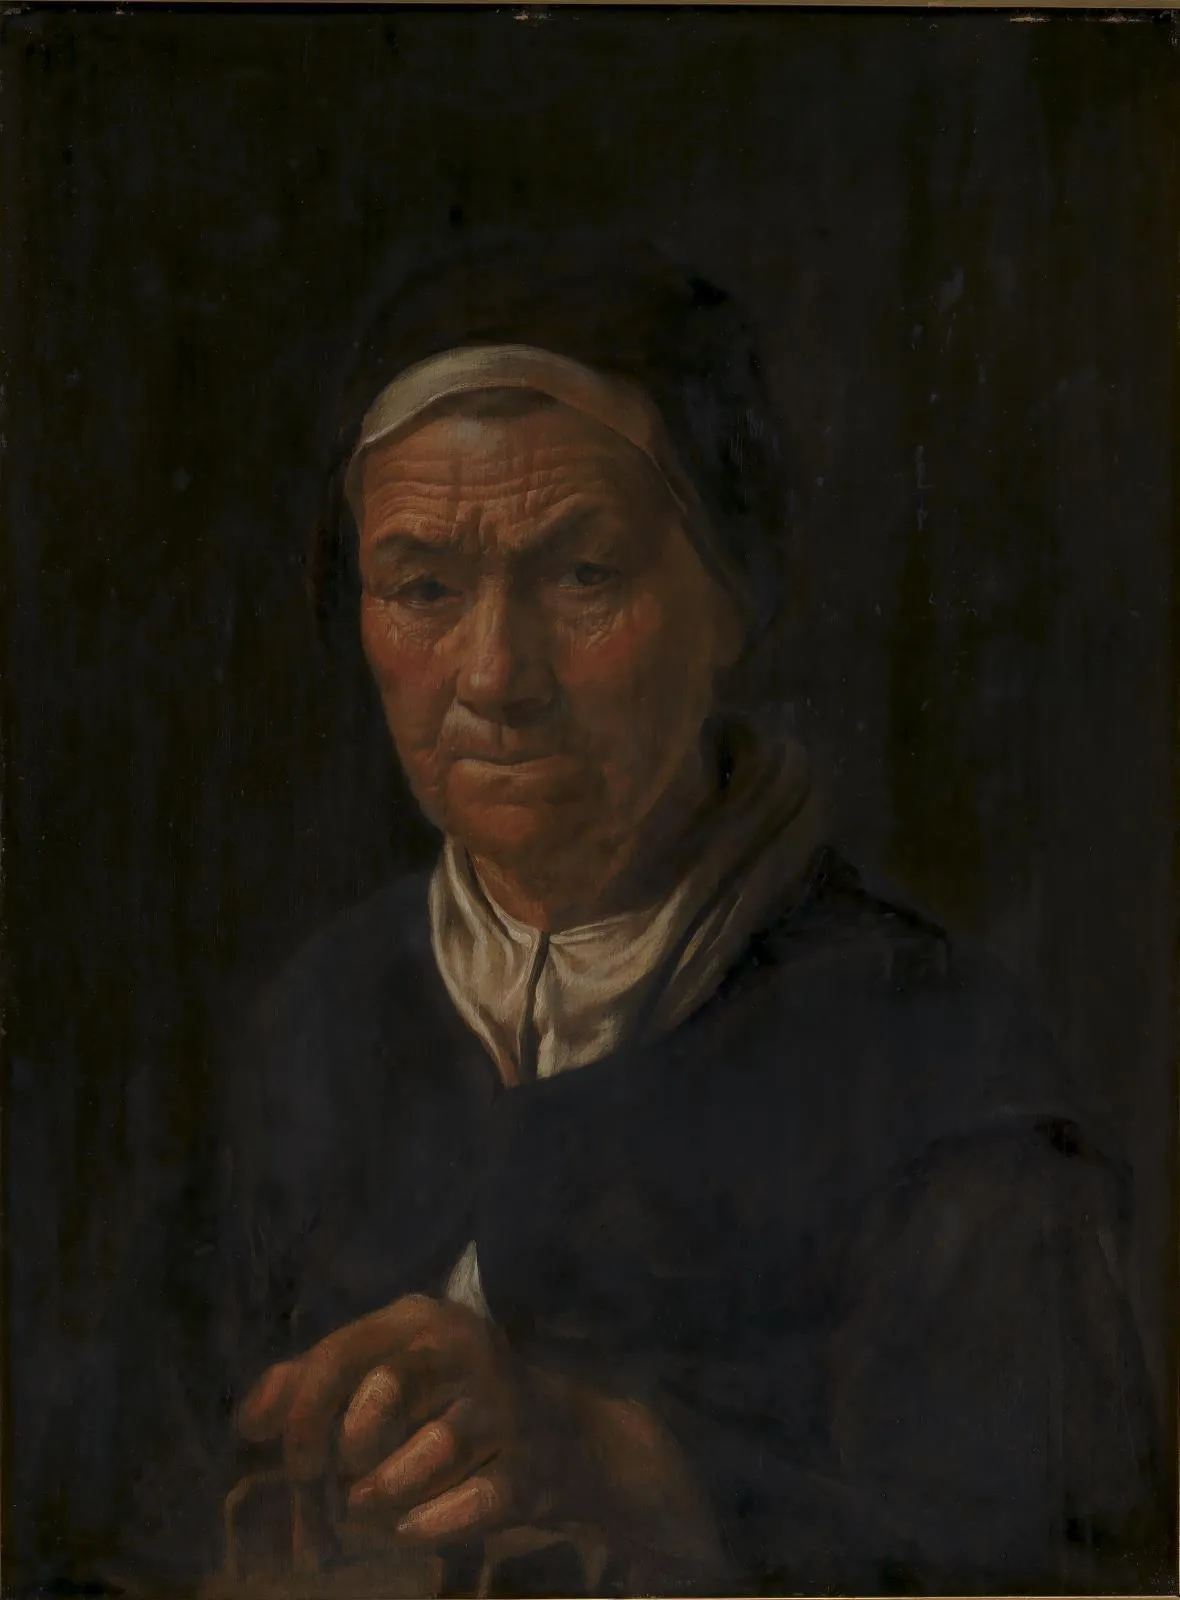
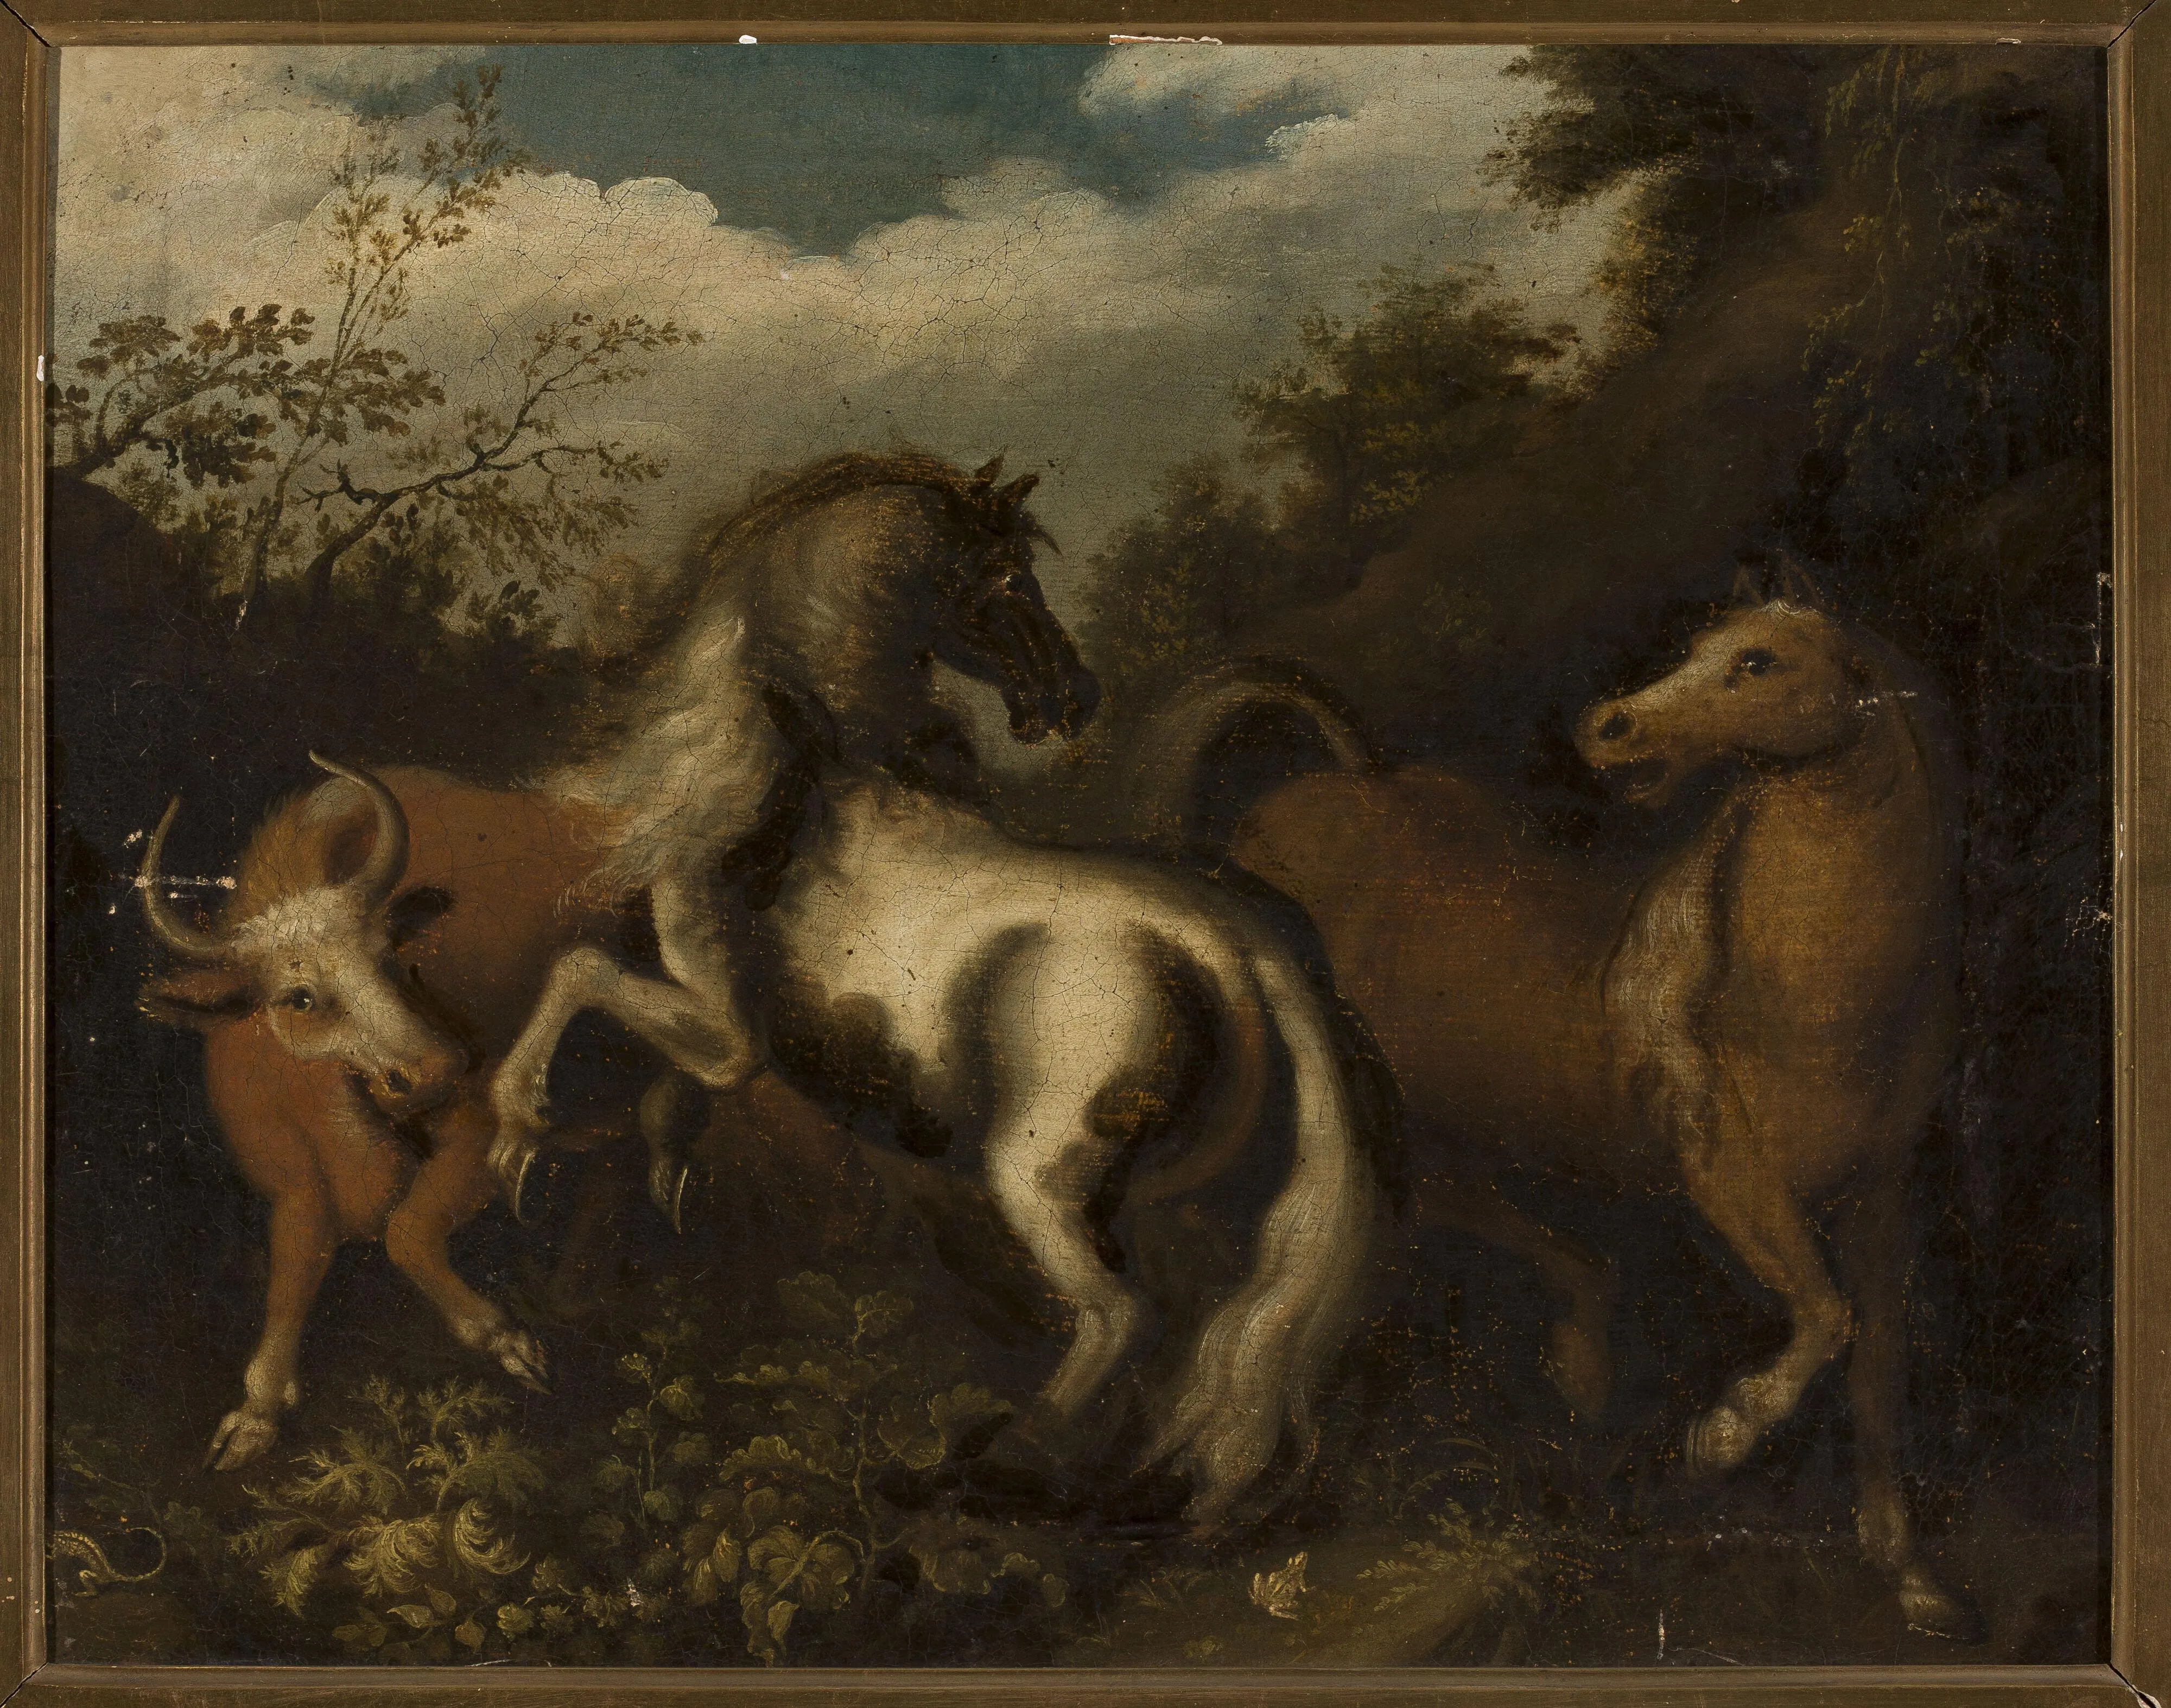
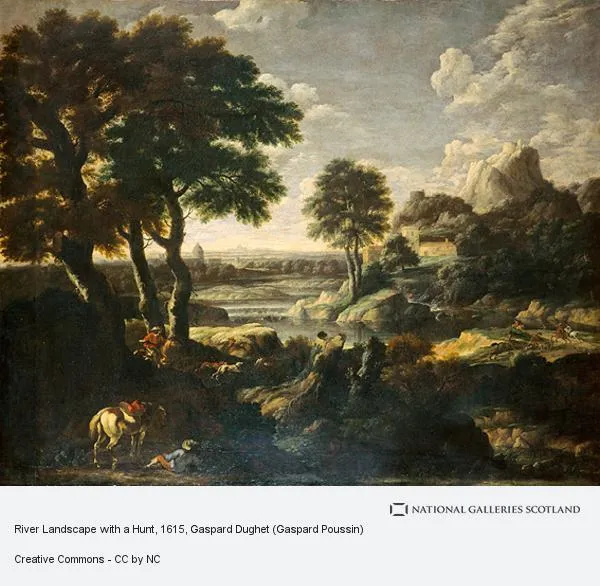
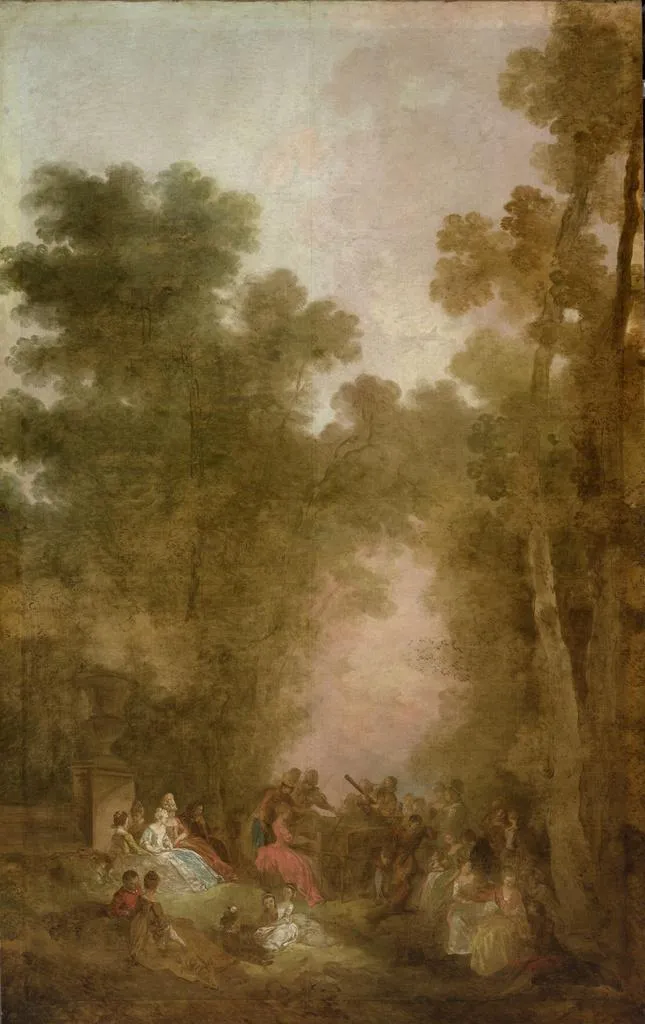

In [9]:
# View sample data
t.select(t.image, t.file_id, t.width, t.height).head(5)

In [10]:
# Check total count
t.count()

151

### Add CLIP Embeddings for Image Search

Create vector embeddings for the artwork images using OpenAI's CLIP model. These embeddings enable semantic search across historical paintings.

In [11]:
# Add image embeddings using HuggingFace CLIP model
from pixeltable.functions.huggingface import clip

t.add_embedding_index(
    'image',
    embedding=clip.using(model_id='openai/clip-vit-base-patch16')
)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


### Generate Image Captions with BLIP

Use BLIP to generate descriptive captions for the historical artwork images.

In [12]:
# Generate image captions using BLIP
from pixeltable.functions.huggingface import image_captioning

t.add_computed_column(
    caption=image_captioning(t.image, model_id='Salesforce/blip-image-captioning-base')
)

/Users/alison-pxt/Documents/Github/pxt-cloud-sets/.venv/lib/python3.11/site-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


Added 151 column values with 0 errors.


151 rows updated, 302 values computed.

image  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                             caption  width  height  
0                   portrait of a man in a red cloak    560     771  
1   an old woman with a white head and a black dress   1180    1600  
2  a painting of a horse and a goat in a wooded s...   4000    3147  
3                 landscape with a person and person    600     586  
4           a painting of people in a wooded setting    645    1024
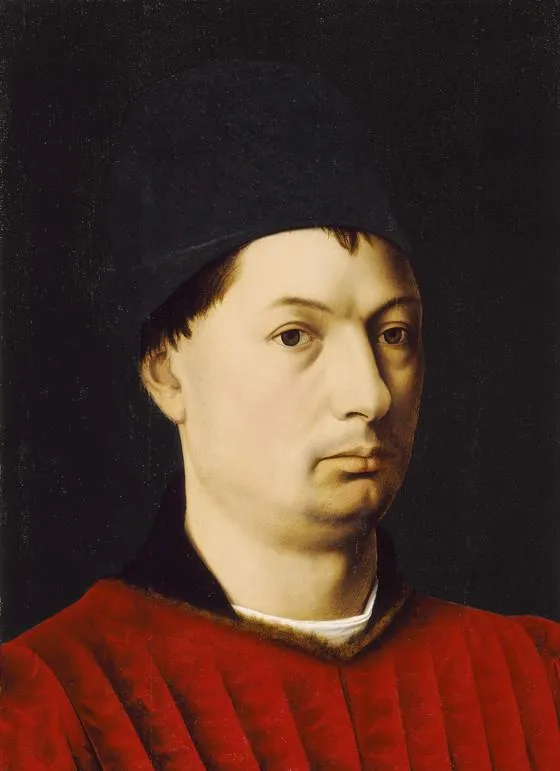
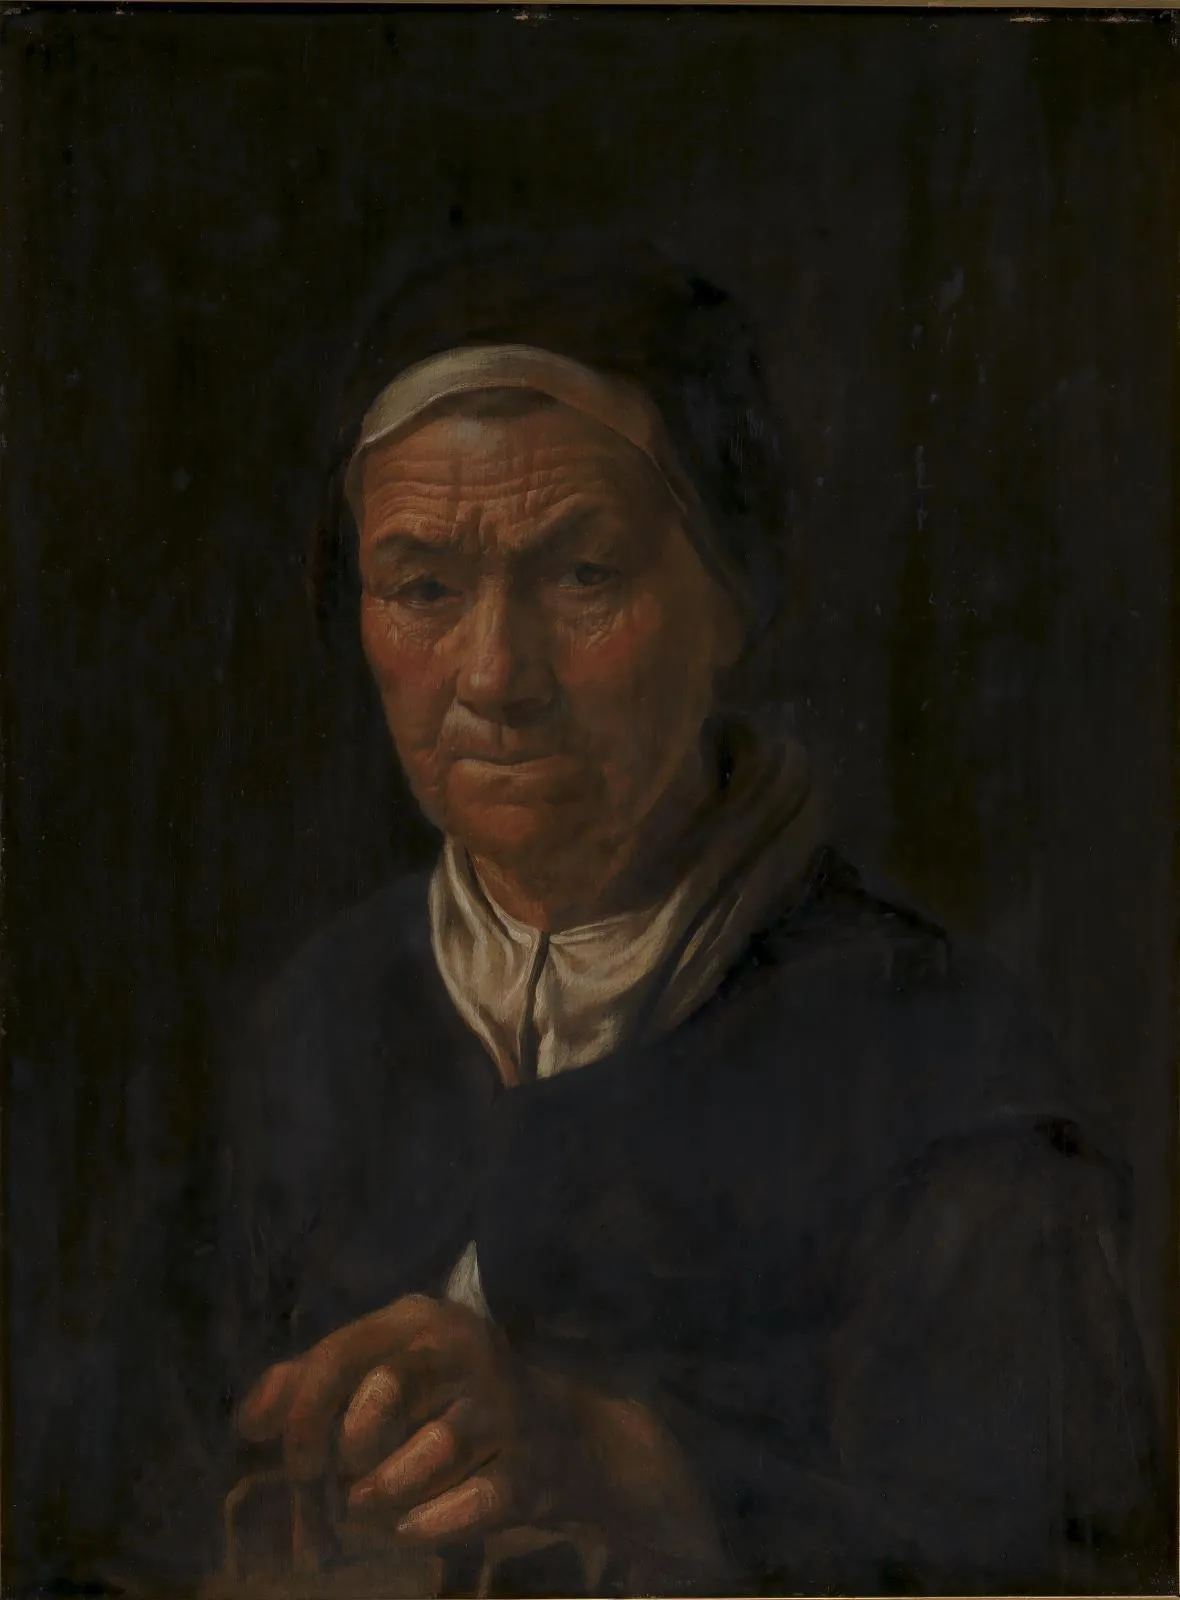
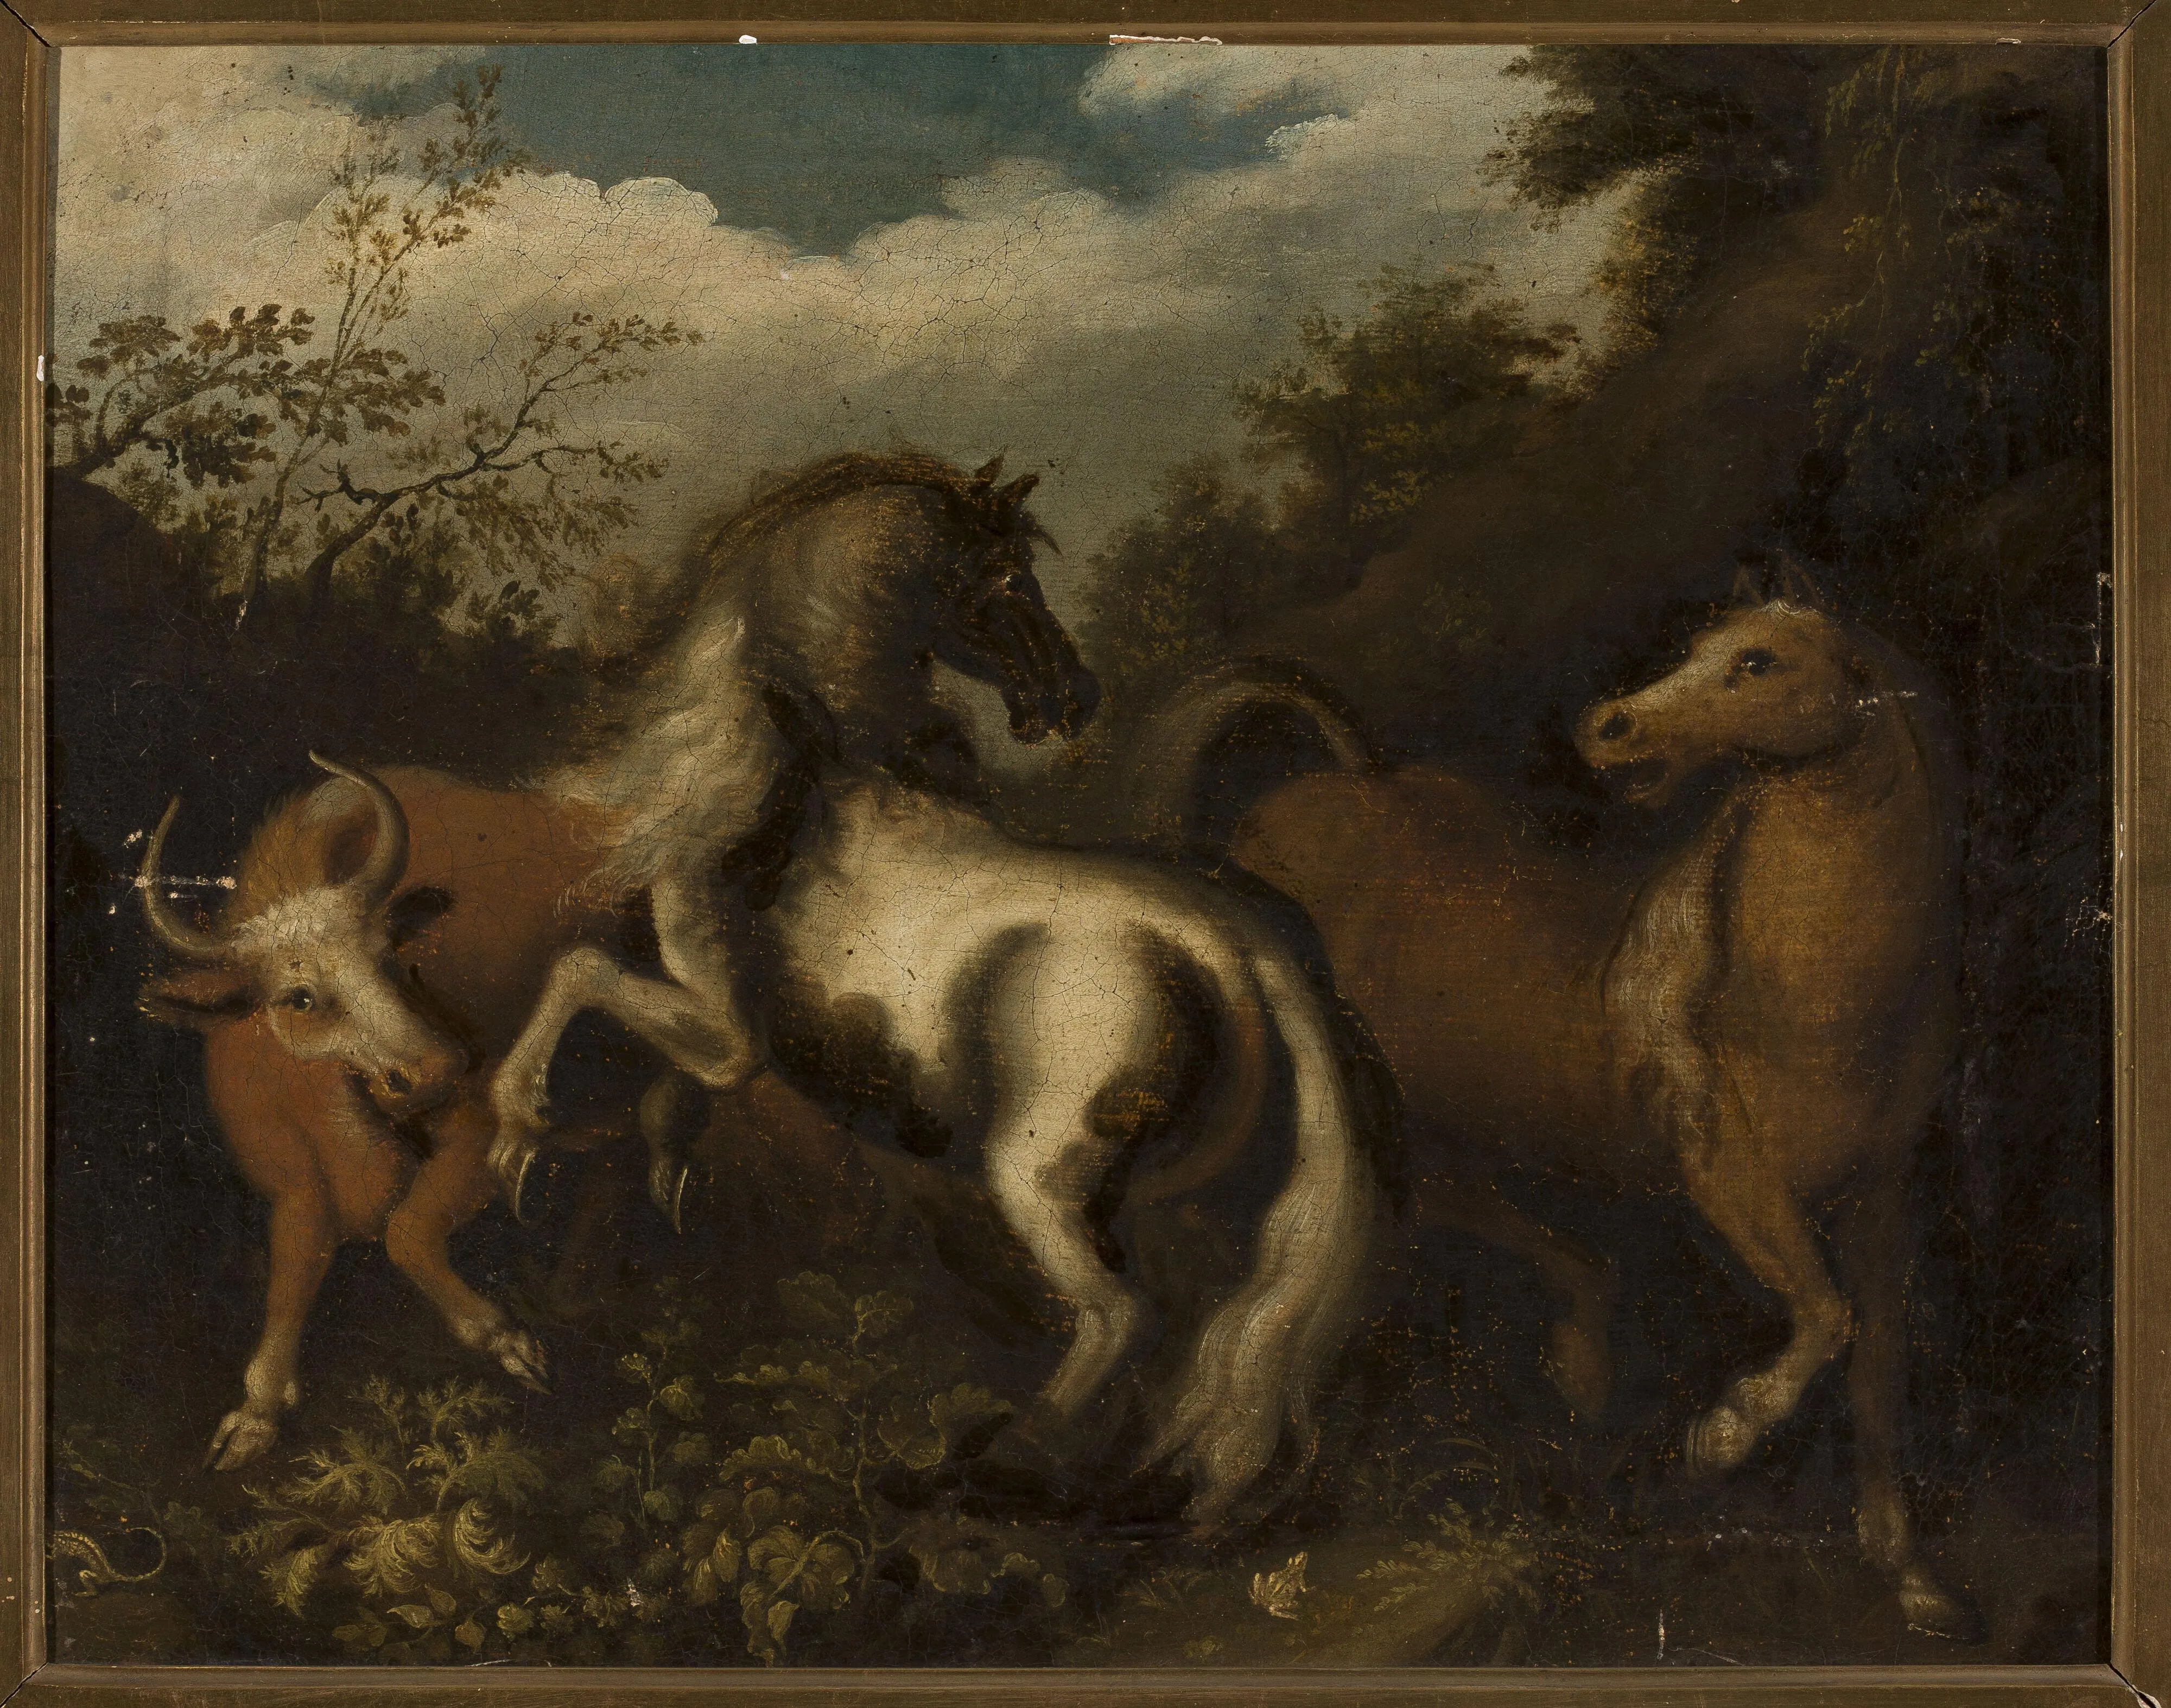
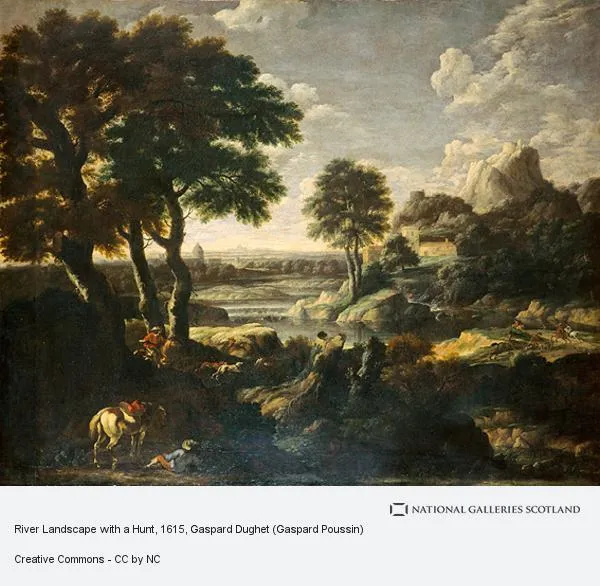
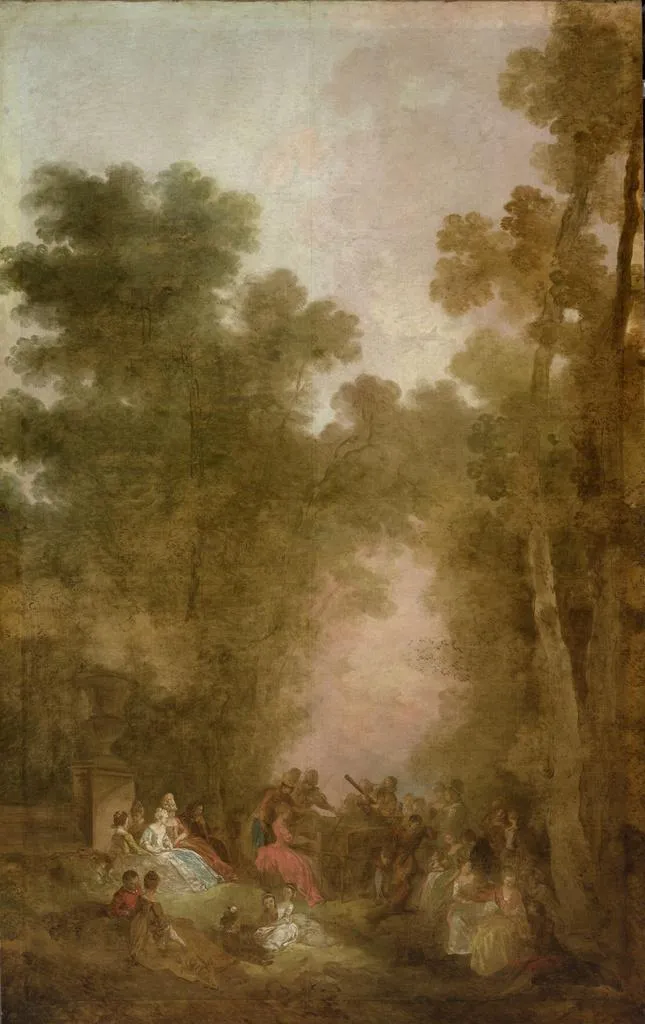

In [13]:
# View images with their AI-generated captions
t.select(t.image, t.caption, t.width, t.height).head(5)

### Publish to Pixeltable Cloud

Publish the table to make it available on Pixeltable Cloud.

In [ ]:
# Publish the table to Pixeltable Cloud
pxt.publish(
    t,
    'pxt://pixeltable:biglam/european_art_sample',
    access='public'
)

In [ ]:
t.push()

### Publish to Pixeltable Cloud

Publish the table to make it available on Pixeltable Cloud.

In [ ]:
# Publish the table to Pixeltable Cloud
pxt.publish(
    t,
    'pxt://pixeltable:biglam/european_art_sample',
    access='public'
)

In [ ]:
t.push()